**import libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

**read the csv file containing the data**

In [0]:
# making data frame 
data = pd.read_csv("Advertising.csv")

**explore the dataset in the dataframe**



In [0]:
#return top 5 rows of the data frame
data.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [0]:
#return bottom 5 rows of the data frame
data.tail(5)

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [0]:
#number of rows, and the number of columns for the data in the DataFrame
data.shape

(200, 5)

In [0]:
#the number of dimensions in your data
data.ndim

2

In [0]:
#check the types of each column 
data.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [0]:
#return all the columns in the dataframe
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [0]:
#view some statistical details
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [0]:
#Delete the "Unnamed: 0" column from the dataframe
data=data.drop(['Unnamed: 0'], axis=1)

In [0]:
#return top 5 rows of the data frame
data.head(5)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Prepare the data for learning with Neural Network**

In [0]:
#A number of activation functions exist in Neural networks, we created a list of some of them. 
activation_types= ["identity", "logistic", "tanh", "relu"]

In [0]:
#Also, there are a number of gradient descent based procedure to update network weights iterative based in training data
solver=['adam','sgd','lbfgs']

In [0]:
#Transforms features by scaling each feature to a given range. which by default is feature_range=(0, 1),
scalar = MinMaxScaler() #create scaler object

X=data[['TV']] #get the TV feature
X = scalar.fit_transform(X) #transform the TV feature
#X = data[['TV','radio', 'newspaper']].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1) #get the TV feature


In [0]:
#split the data set to training and testing set. The testset size is 30% of the whole data 
#random_state parameter is usef for reproducibility of the initial shuffling of training datasets after each epoch.
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=42)

**train the Neural Network**

In [0]:
#here we used just one hidden layer with just one node so  if you want only 1 hidden layer with 5 hidden units hidden_layer_sizes=(5,).
#This can be said to be similar to simple logistic regression
#we used adam optimizer
#batch size = the number of training examples in one forward/backward pass at each epoch, when it is set as auto => min(200, n_samples)
mlr=MLPRegressor(hidden_layer_sizes=(1,), activation=activation_types[2], solver=solver[0], alpha=0.01, batch_size='auto', learning_rate='constant', learning_rate_init=0.1, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [0]:
#fit the defined model on the training data
mlr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1,), learning_rate='constant',
             learning_rate_init=0.1, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
#
mlr.score(X_test, y_test)

0.6417877390185364

In [0]:
#get the values predicted for each training instance 
predictions=list(mlr.predict(X_train))

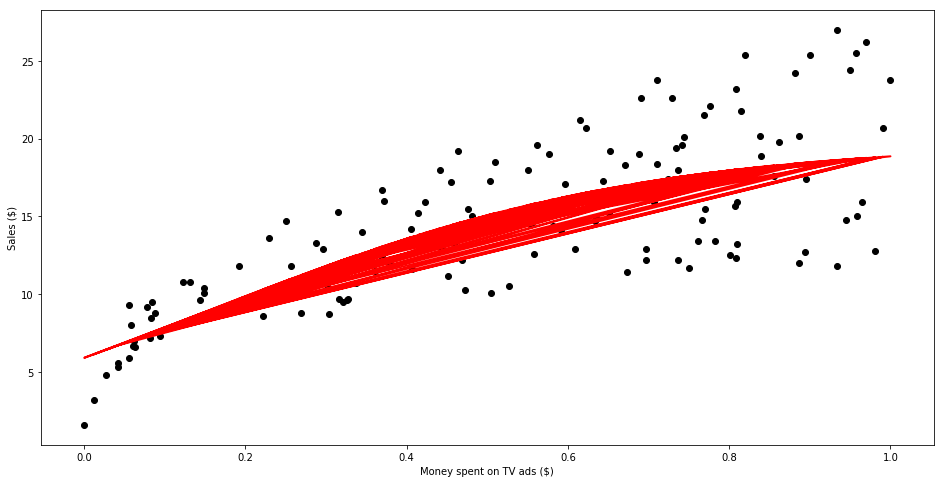

In [0]:
#we can therefore view a plot of the sales vs money spent with the plane
plt.figure(figsize=(16, 8))
plt.scatter(
    X_train,
    y_train,
    c='black'
)
plt.plot(
    X_train,
    predictions,
    c='red',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [0]:
#get the mean square error of the model on the training and test set
from sklearn.metrics import mean_squared_error
print("Mean square error on the training set = ", str(mean_squared_error(y_train, predictions)))
print("Mean square error on the test set = ", str(mean_squared_error(y_test, mlr.predict(X_test))))

Mean square error on the training set =  10.86611828594632
Mean square error on the test set =  9.780845486296641


we created another model using RELU, with a learning rate_init of 0.01 and shuffle false and we obtained a very good fit.

In [0]:
mlp=MLPRegressor(hidden_layer_sizes=(2,), activation=activation_types[3], solver=solver[0], alpha=0.001, batch_size=10, learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=False, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [0]:
mlp.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.001, batch_size=10, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(2,), learning_rate='constant',
             learning_rate_init=0.01, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=False, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
mlp.score(X_test, y_test)

0.6703204760195525

In [0]:
#get the values predicted for each training instance 
predictions2=list(mlp.predict(X_train))

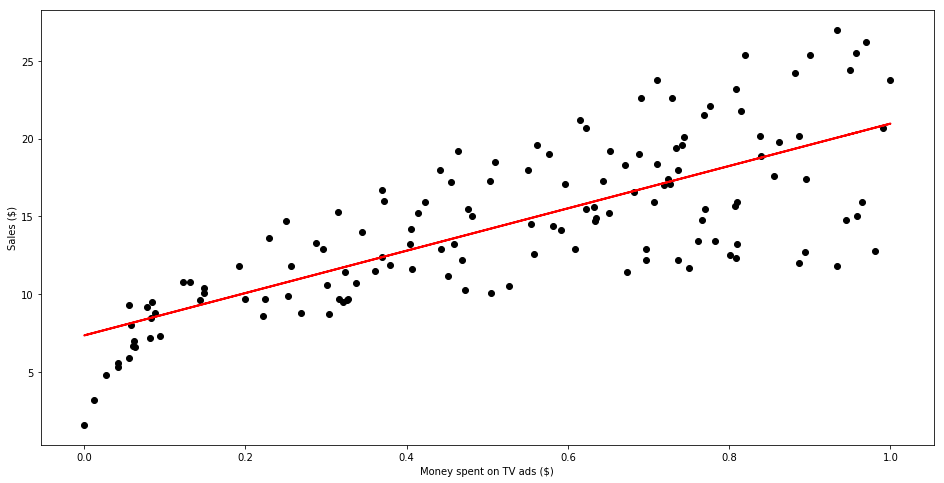

In [0]:
#we can therefore view a plot of the sales vs money spent with the plane
plt.figure(figsize=(16, 8))
plt.scatter(
    X_train,
    y_train,
    c='black'
)
plt.plot(
    X_train,
    predictions2,
    c='red',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [0]:
#get the mean square error of the model on the training and test set
from sklearn.metrics import mean_squared_error
print("Mean square error on the training set = ", str(mean_squared_error(y_train, predictions2)))
print("Mean square error on the test set = ", str(mean_squared_error(y_test, mlp.predict(X_test))))

Mean square error on the training set =  11.19072748032456
Mean square error on the test set =  9.001770277805894


In [0]:
#get the coefficient or the weights of the trainined model
mlp.coefs_

[array([[1.59951334e-52, 3.43945598e+00]]), array([[3.22779920e-55],
        [3.95812194e+00]])]

**Try out multiple regression**

In [0]:
#Transforms features by scaling each feature to a given range. which by default is feature_range=(0, 1),
scalar = MinMaxScaler() #create scaler object
multX = data[['TV','radio', 'newspaper']]
multX = scalar.fit_transform(multX) #transform the TV feature
multy = data['sales'].values.reshape(-1,1) #get the TV feature
#split into training and test set
X_train,X_test,y_train,y_test=train_test_split(multX,multy, test_size=0.3, random_state=42)

In [0]:
#I set the regularization parameter alpha to 0.01 
mmlp=MLPRegressor(hidden_layer_sizes=(3,2), activation=activation_types[3], solver=solver[0], alpha=0.01, batch_size=10, learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=2000, shuffle=False, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [0]:
mmlp.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0, batch_size=10, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(3, 2), learning_rate='constant',
             learning_rate_init=0.01, max_iter=2000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=False, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
mmlp.score(X_train,y_train)

0.9052722169357932

In [0]:
mmlp.score(X_test,y_test)

0.8601666207274972

In [0]:
#get the values predicted for each training instance 
predictions3=list(mmlp.predict(X_train))

In [0]:
#get the mean square error of the model on the training and test set
from sklearn.metrics import mean_squared_error
print("Mean square error on the training set = ", str(mean_squared_error(y_train, predictions3)))
print("Mean square error on the test set = ", str(mean_squared_error(y_test, mmlp.predict(X_test))))

Mean square error on the training set =  2.4857509820998263
Mean square error on the test set =  3.8180956529621413


from the obtained mean square, it can be seen that using other features helped in the prediction model. However, there was a form of overfitting of the model on the training set

References 
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html